In [ ]:
import cv2
import numpy as np
import os
from os import listdir
from matplotlib import image
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


n_clusters=2
path2="/content/drive/MyDrive/MasterM2/attelier3_Clustring/2Classes/"

# pour 4 Classes
path4="/content/drive/MyDrive/MasterM2/attelier3_Clustring/4Classes/"

loaded_images = []
names =[]
for filename in listdir(path2):
    image_data = image.imread(path2+filename)
    names.append(filename)
    loaded_images.append(image_data)
print(names)


['425004.jpg', '425008.jpg', '425003.jpg', '425022.jpg', '425017.jpg', '425011.jpg', '425012.jpg', '425019.jpg', '425005.jpg', '425026.jpg', '425001.jpg', '425014.jpg', '425006.jpg', '425013.jpg', '425002.jpg', '425000.jpg', '425016.jpg', '425028.jpg', '425027.jpg', '425010.jpg', '425023.jpg', '425007.jpg', '425018.jpg', '425020.jpg', '425024.jpg', '425009.jpg', '425025.jpg', '425015.jpg', '425021.jpg', '425042.jpg', '425037.jpg', '425057.jpg', '425043.jpg', '425050.jpg', '425044.jpg', '425061.jpg', '425055.jpg', '425054.jpg', '425051.jpg', '425039.jpg', '425035.jpg', '425047.jpg', '425034.jpg', '425033.jpg', '425029.jpg', '425049.jpg', '425040.jpg', '425048.jpg', '425060.jpg', '425058.jpg', '425045.jpg', '425030.jpg', '425031.jpg', '425056.jpg', '425036.jpg', '425059.jpg', '425038.jpg', '425041.jpg', '425052.jpg', '425032.jpg', '425046.jpg', '425053.jpg', '425093.jpg', '425071.jpg', '425086.jpg', '425068.jpg', '425069.jpg', '425070.jpg', '425085.jpg', '425096.jpg', '425074.jpg', '4250

# ***Sur 2 classe***

**Extraction des caracteristiques**

In [ ]:
from skimage import feature
from skimage.feature import local_binary_pattern


#color
def color_Moments(img):
  colorFeatures=[]
  r=img[1,:,:]
  g=img[2,:,:]
  b=img[3,:,:]
  colorFeatures.append(np.mean(r))

  colorFeatures.append(np.mean(g))
  colorFeatures.append(np.mean(b))
  colorFeatures.append(np.std(r))
  colorFeatures.append(np.std(g))
  colorFeatures.append(np.std(b))
  colorFeatures = colorFeatures/np.mean(colorFeatures)
  return colorFeatures
#histogramme
def vect_desc_his(img):
  vercteurDiscriptive = []
  imgHsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  img_h = imgHsv[:,:,0]
  img_s = imgHsv[:,:,1]
  img_v = imgHsv[:,:,2]
  hist_h = cv2.calcHist([img_h],[0],None, [8],[0,256])
  hist_s = cv2.calcHist([img_s],[0],None, [12],[0,256])
  hist_v = cv2.calcHist([img_v],[0],None, [12],[0,256])
  for i in range(8):
     vercteurDiscriptive.append(hist_h[i][0])
  for i in range(12):
     vercteurDiscriptive.append(hist_s[i][0])
  for i in range(12):
     vercteurDiscriptive.append(hist_v[i][0])
  return vercteurDiscriptive

#texture
from skimage.feature import greycomatrix ,greycoprops
def textureGLCM(img):
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  GLCM = greycomatrix(img_gray,[1],[0])
  energy = greycoprops(GLCM,'energy')[0]
  contrast = greycoprops(GLCM,'contrast')[0]
  correlation = greycoprops(GLCM,'correlation')[0]
  homogeneity = greycoprops(GLCM,'homogeneity')[0]
  glcm =[energy[0],contrast[0],correlation[0],homogeneity[0]]
  return glcm

#form de hu
def HuMoments(img):
    # If image is not a single channel image convert it
    if len(img.shape) != 2:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.moments(img)
    hu_moments = cv2.HuMoments(img).flatten()
    return hu_moments
def local_binary(image):
    E = []
    img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    R = 1
    P =8*R
    output = local_binary_pattern(img, P, R, method='default')
    H = np.histogram(output,bins=4*P,density=True)[0]
    eps = 1e-7
    H = H.astype("float")
    H/=(H.sum()+eps)
    E.extend(H)
    return E
def getFeatures(img):
  # color_Moments
  color_m = color_Moments(img)
  # vect_desc_his
  His = vect_desc_his(img)
  #texture glcm
  texture_glcm = textureGLCM(img)
  # form (shape ) Hu
  hu_m =HuMoments(img)
  texture_glcm = textureGLCM(img)
  LBP = local_binary(img)
  get_features = np.array([])
  get_features = np.concatenate((color_m,His,texture_glcm,hu_m,LBP))
  return get_features

def CBIR_Indexation(images_data):
  features = []
  for i in range (len(images_data)):
     features.append(getFeatures(loaded_images[i]))
     vect = np.array(features)
  return vect

index_Matrix=CBIR_Indexation(loaded_images)
print(index_Matrix.shape)

(200, 81)


Clustering avec le **Kmeans**




In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(index_Matrix)
kmeans.fit(img_features)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(img_features, kmeans.labels_)
print(score)

0.33474892733781714


In [ ]:
import pandas as pd
def importToCsv(imgNm, pred_lbl, file_name):
  data = {'image_name': imgNm,
          'Class': pred_lbl
          }
  df = pd.DataFrame(data, columns= ['image_name', 'Class'])
  df.to_csv (file_name, index = False, header=True)

In [ ]:
importToCsv(names, kmeans.labels_,'/content/drive/MyDrive/MasterM2/attelier3_Clustring/Clustring_CSV/2Classes_cluster_Kmeans.csv')

**Clustering avec le KMedoids**

In [ ]:
# Il faut installer scikit-learn-extra pour pouvoir utiliser KMedoids
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
kmedoids.fit(index_Matrix)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KMedoids(n_clusters=2, random_state=0)

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(index_Matrix, kmedoids.labels_)
print(score)

0.34263736915014725


In [ ]:
importToCsv(names, kmedoids.labels_,'/content/drive/MyDrive/MasterM2/attelier3_Clustring/Clustring_CSV/2Classes_cluster_KMedoids.csv')

** Clustering Hierarchique**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc_agg = AgglomerativeClustering(n_clusters=n_clusters)
hc_agg.fit(index_Matrix)


AgglomerativeClustering()

In [ ]:
importToCsv(names, hc_agg.labels_,'/content/drive/MyDrive/MasterM2/attelier3_Clustring/Clustring_CSV/2Classes_cluster_Hierarchical.csv')
print(np.array(hc_agg.labels_).shape)

(200,)


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(index_Matrix, hc_agg.labels_)
print(score)

0.3244737691762548


# *** FCM***

In [ ]:
#pip install -U scikit-fuzzy
#import skfuzzy as fuzz
!pip install fuzzy-c-means
from fcmeans import FCM
fcm = FCM(n_clusters=n_clusters)
fcm.fit(np.array(index_Matrix))
fcm_labels = fcm.predict(np.array(index_Matrix))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
importToCsv(names, fcm_labels,'/content/drive/MyDrive/MasterM2/attelier3_Clustring/Clustring_CSV/2Classes_cluster_FCM.csv')

# *** Clustering en 4 classes***

In [ ]:
def createFeatures(dataset_path):
  """
  Input: dataset_path: nom du dossier contenant les images par dossier (classe)
  Outpurs:
  features: Matrice de caractéristiques de taille (nombre_d_image x nombre_features)
  image_names: Vecteur retournant les noms des images de la base.
  """
  image_names=[]
  features = []
  dirs = os.listdir(dataset_path)
  dirs.sort()
  for image_name in dirs:
    image_path = dataset_path  + image_name
    image = cv2.imread(image_path)
    feature = getFeatures(image)
    features.append(feature)
    image_names.append(image_name)
  return features, image_names

In [ ]:
featrues,name = createFeatures(path4)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
n_clusters=4
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(featrues)
kmeans.fit(img_features)
print(kmeans.labels_)

[1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 3 1 3 1 3 3 3 1 1 1 1 1 3 3 1 3 1 1 1 1 1 3 1 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
importToCsv(name, kmeans.labels_,'/content/drive/MyDrive/MasterM2/attelier3_Clustring/Clustring_CSV/4Classes_cluster_Kmeans.csv')

# ***3.3- Segmentation des images***
**3.3.1- Utilisant les intensités des pixels**
Dans cette partie, nous allons voir comme appliquer les algorithmes de clustering pour la segmentation des images. Nous allons utiliser les intensités des pixels comme information de clustering.

Nous allons dans un premier temps segmenter l'image à niveau de gris et par la suite segmenter l'image couleur dans l'espace RGB

(337, 336)


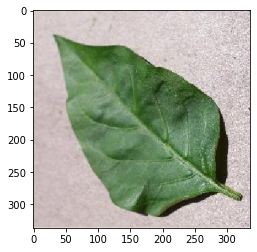

In [ ]:
from matplotlib import image
import matplotlib.pyplot as plt
path_image ='/content/drive/MyDrive/MasterM2/attelier3_Clustring/Sigmentation/1.bmp'

img= image.imread(path_image)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
print(img_gray.shape)

In [ ]:
img_1D =img_gray.reshape(-1)
img_1D = img_1D.reshape(113232,1)
img_1D.shape

(113232, 1)

In [ ]:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(img_1D)
kmeans.fit(img_features)
print(kmeans.labels_.shape)

(113232,)


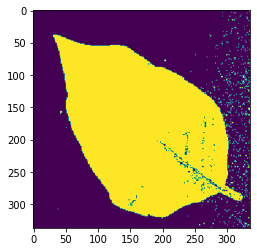

In [ ]:
# Reconstruire le mask de segmentation 2D à partir des classes obtenues 1D
mask=kmeans.labels_.reshape((337,336))

#Afficher le mask de segmentation obtenu
import matplotlib.pyplot as plt
plt.imshow(mask)

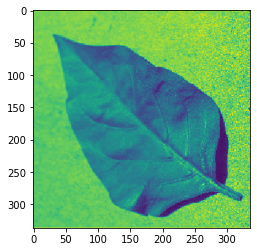

In [ ]:
im = img_gray
for i in range(mask.shape[0]):
  for j in range(mask.shape[1]):
    if(mask[i][j] == 20):
        im[i][j] =0
plt.imshow(im)

# ***Segmenter l'image couleur dans l'espace RGB***

(337, 336, 3)


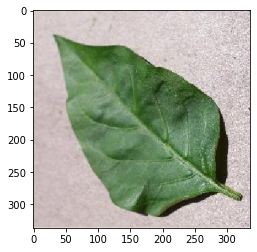

In [ ]:
path_image ='/content/drive/MyDrive/MasterM2/attelier3_Clustring/Sigmentation/1.bmp'

img= image.imread(path_image)
plt.imshow(img)
print(img.shape)

In [ ]:
# Code pour aplatir de l'image: 3x2D => 3x1D
img_reshape=img.reshape((-1,3))
img_reshape = np.float32(img_reshape)
# Appliquer le K-means
print(img_reshape.shape)

n_clusters=2
img_r = []
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
#img_features = QuantileTransformer(n_quantiles=10).fit_transform(img_reshape[:,i].reshape(113232,1))
kmeans.fit(img_reshape)
prediction = kmeans.labels_.reshape(113232,1)



(113232, 3)
(0,)


'# Reconstruire le mask de segmentation 2D à partir des classes obtenues 1D\nmask=\n\nimport matplotlib.pyplot as plt\nplt.imshow(mask)'

In [ ]:
print(kmeans.cluster_centers_)

[[ 89.02392  120.964966  79.33105 ]
 [209.92575  198.42656  197.65457 ]]


In [ ]:
centers = np.uint8(kmeans.cluster_centers_)
image_segmenter = centers [prediction.flatten()]
print(image_segmenter.shape)

(113232, 3)


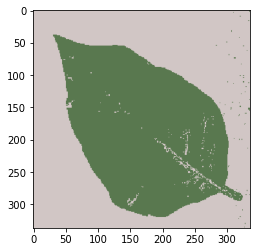

In [ ]:
image_segmenter = image_segmenter.reshape((img.shape))
# Reconstruire le mask de segmentation 2D à partir des classes obtenues 1D
mask=image_segmenter

import matplotlib.pyplot as plt
plt.imshow(mask)

# ***3.3.1- Utilisant des caractéristiques extraites pour chaque pixel***
Contrairement à la partie précédente, dans cette partie nous allons extraire des caractéristiques de chaque pixel en plus de l'intensité ; à savoir la différence avec l'intensité maximale, la différence avec l'intensité minimale, la différence avec la moyenne des intensités et , la différence avec la déviation standard des intensités.

Ce qui va nous permettre d'extraire 5 caractéristiques pour chaque pixel.

In [ ]:
def featuresPixel(img):
  max = np.max(img);
  min = np.min(img)
  mean = np.mean(img)
  std =np.std(img)
  return max,min,mean,std

In [ ]:
import cv2 as cv
import numpy as np
from sklearn import preprocessing

# Extraction des caractéristiques
image_path="/content/drive/MyDrive/MasterM2/attelier3_Clustring/Sigmentation/1.bmp"
image=cv.imread(image_path)
img= cv.cvtColor(image, cv.COLOR_RGB2GRAY)
print(img.shape)

# Code pour aplatir de l'image: 2D => 1D
img_reshape= img.reshape(-1)

# Code pour extraires les caractéristiques de chaque pixel
clasteringFeat=np.zeros((img_reshape.shape))
max,min,mean,std = featuresPixel(img_reshape)
img_features_pixel = []
for i in range(img_reshape.shape[0]):
  img_features_pixel.append((img_reshape[i],img_reshape[i]-max,img_reshape[i]-min,img_reshape[i]-mean,img_reshape[i]-std))

print(np.array(img_features_pixel).shape)
# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, algorithm="elkan", n_init=100, init='random')
img_features = QuantileTransformer(n_quantiles=10).fit_transform(img_features_pixel)
kmeans.fit(img_features)
print(np.array(img_features).shape)
print(kmeans.labels_.shape)


(337, 336)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


(113232, 5)
(113232, 5)
(113232,)


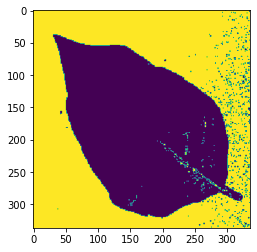

In [ ]:
# Reconstruire le mask de segmentation 2D à partir des classes obtenues 1D
label = kmeans.labels_.reshape((113232,1))
mask = label.reshape((337,336))

#Afficher le mask de segmentation obtenu
import matplotlib.pyplot as plt
plt.imshow(mask)

# ***3.4- Segmentation d'images par classification supervisée***
Dans cette partie nous allons developper un modéle de classification supervisée pour la segmentation des images.

Comme entrée du modéle nous aurons une image et son mask de segmentation Ainsi, nous allons créer un vecteur de caractéristiques pour chaque pixel utilisant les intensités respectives en R, G, B, H, S, et V. Nous allons utiliser l'algorithme de classification SVM

# ***3.4.1- Extraction des caracteristiques***

(113232, 6)


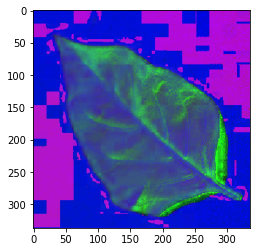

In [ ]:
# Charger l'image originale
import cv2 as cv
import numpy as np
image_path="/content/drive/MyDrive/MasterM2/attelier3_Clustring/Sigmentation/1.bmp"
image=cv.imread(image_path)
import matplotlib.pyplot as plt
plt.imshow(image)
# Features dans l'espace RGB
feature_B,feature_G,feature_R = cv.split(image)

"""feature_R = image[:,:,2]
feature_G = image[:,:,1]
feature_B = image[:,:,0]"""
# Features dans l'espace HSV
imageHSV = cv.cvtColor(image,cv.COLOR_BGR2HSV)
plt.imshow(imageHSV )
feature_H = imageHSV[:,:,0]
feature_S = imageHSV[:,:,1]
feature_V = imageHSV[:,:,2]
#reshape
feature_R = feature_R.reshape(-1).reshape((113232,1))
feature_G = feature_G.reshape(-1).reshape((113232,1))
feature_B = feature_B.reshape(-1).reshape((113232,1))
feature_H = feature_H.reshape(-1).reshape((113232,1))
feature_S = feature_S.reshape(-1).reshape((113232,1))
feature_V = feature_V.reshape(-1).reshape((113232,1))

# Concatener les caractéristiques dans une variable X
X=np.zeros((113232,6))
for i in range(X.shape[0]):
  X[i]=np.append(feature_R[i],[feature_G[i],feature_B[i],feature_H[i],feature_S[i],feature_V[i]])

print(X.shape)

# ***3.4.2- Création des étiquettes***
Nous allons utiliser le masque de segmentation fourni pour créer les étiquettes pour chaque pixel.

151.50398297301118
68027
113232


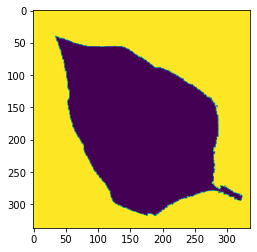

In [ ]:
import cv2 as cv
mask_path="/content/drive/MyDrive/MasterM2/attelier3_Clustring/Sigmentation/1_GT.bmp"
imageMask=cv.imread(mask_path, cv.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(imageMask)
# Concatener les etiquettes dans la variable Y
im= imageMask.reshape(-1).reshape((113232,1))
y = np.zeros(im.shape)
for i in range(im.shape[0]):
  if(im[i] != 0):
      y[i] = 1
#p rint(np.array(imageMask).shape)

In [ ]:
X.shape, y.shape

((113232, 6), (113232, 1))

# ***3.4.3- Entrainement et évaluation***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("y predict : ",y_pred)
confusion_matrix(y_test, y_pred)
print(clf.score)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


y predict :  [0. 1. 1. ... 0. 0. 1.]
<bound method ClassifierMixin.score of SVC()>


In [ ]:
rapport=classification_report(y_test, y_pred)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)
import sklearn.metrics as metrics
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("precision: ", metrics.precision_score(y_test, y_pred, average='macro'))
print("recall : ", metrics.recall_score(y_test, y_pred, average='macro'))
print("f1 score: ", metrics.f1_score(y_test, y_pred, average='macro'))

Rapport de Classification : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     14920
         1.0       1.00      0.98      0.99     22447

    accuracy                           0.99     37367
   macro avg       0.99      0.99      0.99     37367
weighted avg       0.99      0.99      0.99     37367

accuracy:  0.9881178580030509
precision:  0.9864605815395812
recall :  0.988918875454138
f1 score:  0.9876470489007386


In [ ]:
clf = svm.SVC(C=1,kernel='rbf')
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ***3.4.4- Segmenter une nouvelle image***

In [ ]:
image_path="/content/drive/MyDrive/MasterM2/attelier3_Clustring/Sigmentation/2.bmp"
image=cv.imread(image_path)

# descirpteur: Intensités dans l'espace RGB
feature_R = image[:,:,2]
feature_G = image[:,:,1]
feature_B = image[:,:,0]
# descirpteur: Intensités dans l'espace RGB
imageHSV = cv.cvtColor(image,cv.COLOR_BGR2HSV)
feature_H = imageHSV[:,:,0]
feature_S = imageHSV[:,:,1]
feature_V = imageHSV[:,:,2]
#reshape
feature_R = feature_R.reshape(-1).reshape((113232,1))
feature_G = feature_G.reshape(-1).reshape((113232,1))
feature_B = feature_B.reshape(-1).reshape((113232,1))
feature_H = feature_H.reshape(-1).reshape((113232,1))
feature_S = feature_S.reshape(-1).reshape((113232,1))
feature_V = feature_V.reshape(-1).reshape((113232,1))
# Créer le vecteur descripteur Xnew
Xnew=np.zeros((113232,6))
for i in range(X.shape[0]):
  Xnew[i]=np.append(feature_R[i],[feature_G[i],feature_B[i],feature_H[i],feature_S[i],feature_V[i]])
print("image shape : ",image.shape)
print(Xnew.shape)


image shape :  (337, 336, 3)
(113232, 6)


***Segmenter l'image revient à prédire les étiquettes de chaque pixel de l'image.***

In [ ]:
y_new=clf.predict(Xnew)
print(y_new.shape)

(113232,)


Construire l'image segmentée (mask) utilisant le vecteur prédit *y*

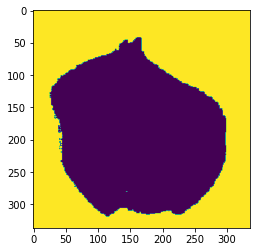

In [ ]:
# Reconstruire le masque de segmentation
label = y_new.reshape((113232,1))
mask_new=label.reshape((337,336))
import matplotlib.pyplot as plt
plt.imshow(mask_new)

# ***3.4.5- Evaluer le modéle***
Pour évaluer le modéle, il faut utiliser le masque de segmentation fourni

In [ ]:
mask_path_2GT="/content/drive/MyDrive/MasterM2/attelier3_Clustring/Sigmentation/2_GT.bmp"
imageMask_2GT=cv.imread(mask_path_2GT, cv.IMREAD_GRAYSCALE).ravel()//255
imageMask_2GT = imageMask_2GT.reshape(-1,1)
y_2GT =np.concatenate(imageMask_2GT)

confusion_matrix(y_2GT, y)
rapport=classification_report(y_2GT, y_new)
# Afficher le rapport sous forme de tableau
print('Rapport de Classification : \n',rapport)
import sklearn.metrics as metrics
print("accuracy: ", metrics.accuracy_score(y_2GT,  y_new))
print("precision: ", metrics.precision_score(y_2GT,  y_new, average='macro'))
print("recall : ", metrics.recall_score(y_2GT,  y_new, average='macro'))
print("f1 score: ", metrics.f1_score(y_2GT,  y_new, average='macro'))

Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     52426
           1       0.99      0.98      0.99     60806

    accuracy                           0.99    113232
   macro avg       0.99      0.99      0.99    113232
weighted avg       0.99      0.99      0.99    113232

accuracy:  0.9858255616786774
precision:  0.9853227794579478
recall :  0.9863225406333729
f1 score:  0.985763018354282


# TEST SUR IMAGE ***TEST***

image shape :  (337, 336, 3)
(113232, 6)


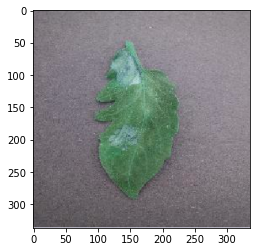

In [ ]:
image_path="/content/drive/MyDrive/MasterM2/attelier3_Clustring/Sigmentation/test.bmp"
image=cv.imread(image_path)
import matplotlib.pyplot as plt
plt.imshow(image)
# descirpteur: Intensités dans l'espace RGB
feature_R = image[:,:,2]
feature_G = image[:,:,1]
feature_B = image[:,:,0]
# descirpteur: Intensités dans l'espace RGB
imageHSV = cv.cvtColor(image,cv.COLOR_BGR2HSV)
feature_H = imageHSV[:,:,0]
feature_S = imageHSV[:,:,1]
feature_V = imageHSV[:,:,2]
#reshape
feature_R = feature_R.reshape(-1).reshape((113232,1))
feature_G = feature_G.reshape(-1).reshape((113232,1))
feature_B = feature_B.reshape(-1).reshape((113232,1))
feature_H = feature_H.reshape(-1).reshape((113232,1))
feature_S = feature_S.reshape(-1).reshape((113232,1))
feature_V = feature_V.reshape(-1).reshape((113232,1))
# Créer le vecteur descripteur Xnew
XTest=np.zeros((113232,6))
for i in range(X.shape[0]):
  XTest[i]=np.append(feature_R[i],[feature_G[i],feature_B[i],feature_H[i],feature_S[i],feature_V[i]])
print("image shape : ",image.shape)
print(XTest.shape)

In [ ]:
yTest=clf.predict(XTest)
print(yTest.shape)

(113232,)


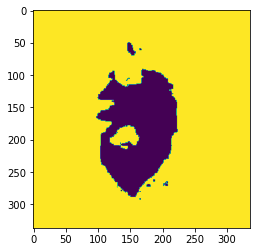

In [ ]:
# Reconstruire le masque de segmentation
label = yTest.reshape((113232,1))
mask_new=label.reshape((337,336))
import matplotlib.pyplot as plt
plt.imshow(mask_new)